# MNIST Handwritten Digit Classification

In [51]:
# !pip install certifi
# !python3 -m certifi

In [52]:
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz

In [53]:

# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

## Load MNIST Dataset

In [54]:
# define cnn model

def define_model():
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dropout(0.2))
 model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(10, activation='softmax'))
 # compile model
 model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
 return model

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


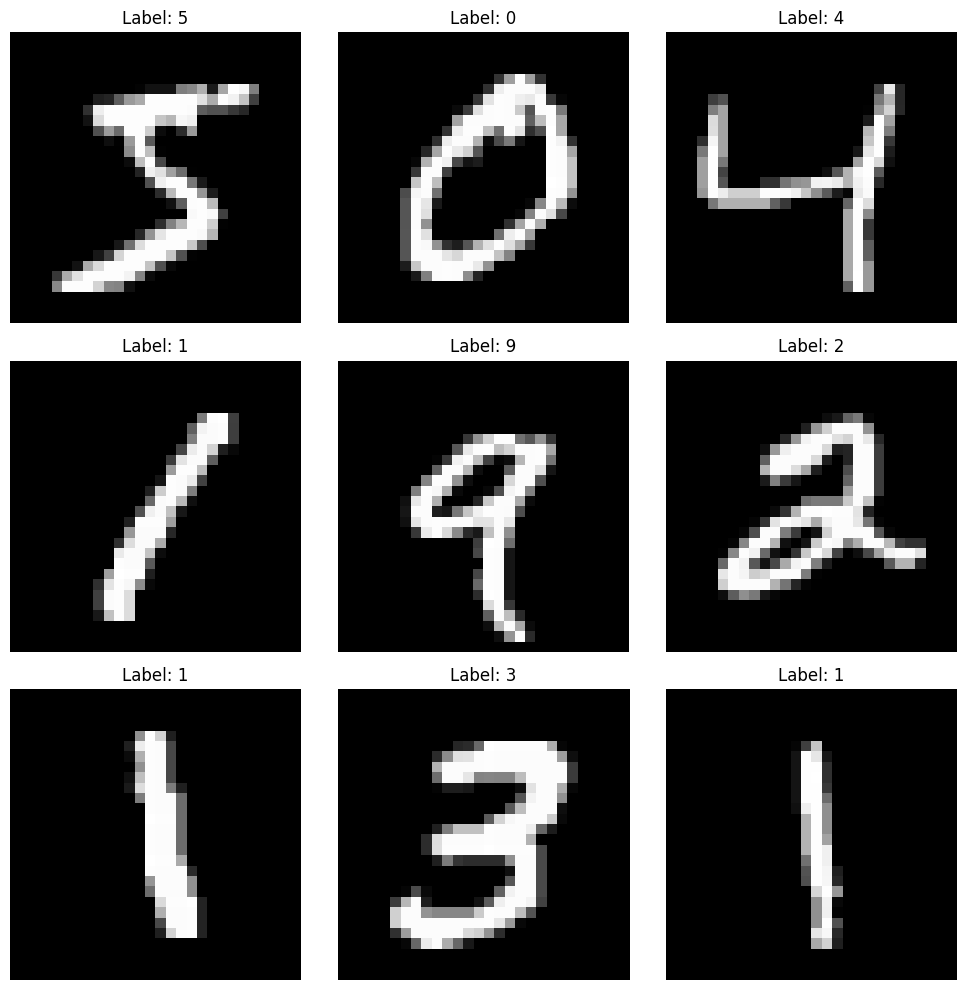

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npz file
data = np.load('mnist.npz')

# Extract arrays from the .npz file
train_images = data['x_train']
train_labels = data['y_train']
test_images = data['x_test']
test_labels = data['y_test']

# Summarize loaded dataset
print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))

# Plot first few images
plt.figure(figsize=(10, 10))
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f'Label: {train_labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


## Model Evaluation Methodology

In [56]:

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# record model performance on a validation dataset during training
model = define_model()
history = model.fit(train_images,train_labels, validation_data=(test_images, test_labels), epochs=100, batch_size=32)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.2017 - loss: 117.2635 - val_categorical_accuracy: 0.5956 - val_loss: 24.8653
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.4802 - loss: 42.6030 - val_categorical_accuracy: 0.7332 - val_loss: 14.3317
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.6025 - loss: 28.6187 - val_categorical_accuracy: 0.7903 - val_loss: 10.5569
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.6651 - loss: 22.3112 - val_categorical_accuracy: 0.8189 - val_loss: 8.7873
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.7032 - loss: 18.5736 - val_categorical_accuracy: 0.8416 - val_loss: 7.6623
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.7329 - loss: 16.1443 - val_categorical_accuracy: 0.8561 - val_loss: 6.7635
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/ste

In [58]:
# save model
model.save('final_model.h5')

In [81]:
import cv2


def load_image(filename):
    # Load the image in grayscale
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

    if img is None:
        raise FileNotFoundError(f"Image at path '{filename}' could not be loaded.")

    # Resize the image to 28x28 pixels
    img = cv2.resize(img, (28, 28))

    # Reshape the image to the shape required by the model
    img = img.reshape(1, 28, 28, 1)

    # Convert the image to float32 and normalize the pixel values to the range [0, 1]
    img = img.astype('float32')
    img = img / 255.0

    return img

# load an image and predict the class
def run_example():
    # load the image
    img = load_image('5.jpg')
    # load model
    model = load_model('final_model.h5')
    # predict the class
    predict_value = model.predict(img)
    digit = argmax(predict_value)
    print(digit)

In [82]:
# entry point, run the example
run_example()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
8
